# Get Packages


In this notebook we will through all the steps from downloading the data and training a model to evaluating the results. Check out the `environment.yml` file for the required Python packages.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread # skimage is an image processing library
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import random_noise
from scipy import signal # scipy contains algorithms for scientific computing and numerical analysis
import matplotlib.pyplot as plt

In [3]:
!pip install cairosvg # file convertion library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=09bbc0afc1dcef6feaeeb82e6fe0f6b8b95c5394115b6a343148afd25634f52f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [4]:
from io import BytesIO
from PIL import Image # PIL is an image processing library
from cairosvg import svg2png

In [5]:
from skimage.filters import sobel_v, sobel_h, sobel
from skimage.transform import rescale, resize

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.dpi'] = 100

In [8]:
def plot_surface(x, y, f):
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm)
#     cset = ax.contour(x, y, f, zdir='z', offset=0, cmap=cm.twilight)
    # cset = ax.contour(x, y, f, zdir='x', offset=-len(x)//2, cmap=cm.twilight)
    # cset = ax.contour(x, y, f, zdir='y', offset=len(y)//2, cmap=cm.twilight)
#     ax.set_xlabel('u')
#     ax.set_xlim(-180, 180)
#     ax.set_ylabel('v')
#     ax.set_ylim(-180, 180)
    fig.colorbar(surf)
    plt.show()

## Open the data

In [9]:
z500_dataset_path = "/content/drive/MyDrive/Machine Learning Project Files/Data/geopotential_500/*.nc"

temp_2m_dataset_path = "/content/drive/MyDrive/Machine Learning Project Files/Data/temperature_2m/*nc"

solar_dataset_path = "/content/drive/MyDrive/Machine Learning Project Files/Data/toa_incident_solar_radiation/*nc"

In [10]:
z500 = xr.open_mfdataset(z500_dataset_path, combine='by_coords') # Contains geopotential data

## Visualize the data

In [11]:
z500 

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 350640)
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 dask.array<chunksize=(8760, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [12]:
z500.z

<xarray.DataArray 'z' (time: 350640, lat: 32, lon: 64)>
dask.array<concatenate, shape=(350640, 32, 64), dtype=float32, chunksize=(8784, 32, 64), chunktype=numpy.ndarray>
Coordinates:
    level    int32 500
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

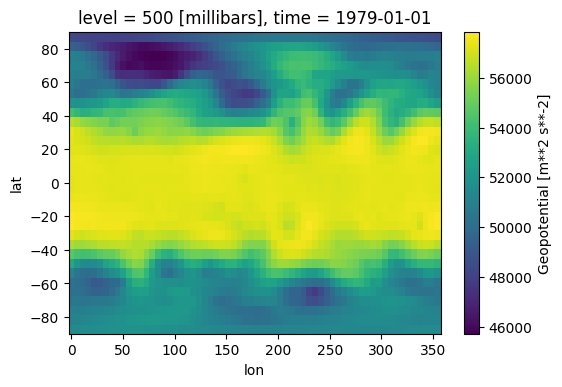

In [13]:
# Plot an example
# time = 0, 1, 2, ... 1 hour apart 
z500.z.isel(time=0).plot();

In [14]:
test1 = np.array(z500.z.isel(time=0))

In [15]:
def normalize(x):
    return (((x-x.min())/(x.max()-x.min()))*255).astype(np.uint8)

In [16]:
pp= ((test1-test1.min())/(test1.max()-test1.min())*255).astype(np.uint8)

In [17]:
z_np = np.array(z500.z)
z_np.shape

(350640, 32, 64)

In [18]:
z_np

array([[[51559.297, 51582.438, 51605.562, ..., 51497.625, 51513.047,
         51536.17 ],
        [51150.67 , 51127.547, 51196.938, ..., 51181.516, 51189.22 ,
         51181.516],
        [50950.22 , 50873.125, 50888.547, ..., 51258.61 , 51166.098,
         51050.457],
        ...,
        [50965.64 , 50857.703, 50664.953, ..., 50857.703, 50927.094,
         50973.344],
        [49539.312, 49300.297, 48999.61 , ..., 49978.766, 49863.13 ,
         49716.645],
        [48367.406, 48290.297, 48228.625, ..., 48590.99 , 48513.895,
         48444.5  ]],

       [[51520.75 , 51543.875, 51574.72 , ..., 51459.08 , 51482.203,
         51497.625],
        [51112.125, 51104.42 , 51189.22 , ..., 51158.39 , 51158.39 ,
         51150.67 ],
        [50896.25 , 50819.156, 50849.984, ..., 51212.36 , 51119.848,
         50996.49 ],
        ...,
        [50973.344, 50888.547, 50703.5  , ..., 50780.59 , 50880.824,
         50950.22 ],
        [49516.17 , 49277.17 , 48961.062, ..., 49947.94 , 49847.707,
   

In [19]:
pp = normalize(z_np[0])

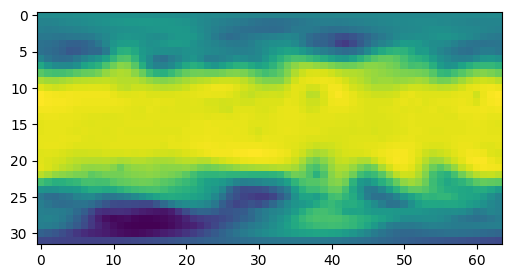

In [20]:
plt.imshow(z_np[0])

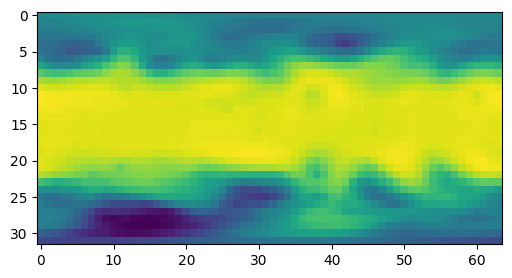

In [21]:
plt.imshow(pp)

In [22]:
import numpy as np
import cv2
size = 32, 64
duration = 60 #seconds
fps = 60
out = cv2.VideoWriter('output2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)
for i in range(fps * duration):
    data = normalize(z_np[i])
    out.write(data)
out.release()

In [23]:
lat = np.array(z500.coords['lat'])
lat = np.reshape(lat, (len(lat), 1))
lat.shape

(32, 1)

In [24]:
lon = np.array(z500.coords['lon'])
lon = np.reshape(lon, (len(lon), 1))
lon.shape

(64, 1)

In [25]:
x, y = np.meshgrid(lon, lat)

In [26]:
z500_t0 = np.array(z500.z.isel(time=0))
z500_t0.shape

(32, 64)

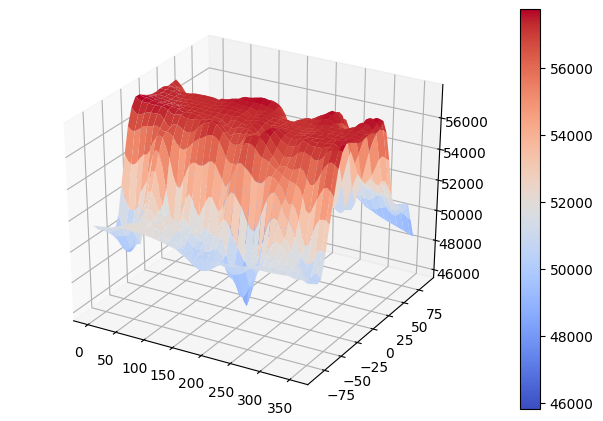

In [27]:
plot_surface(x, y, z500_t0)